In [1]:
%matplotlib inline

## vCircular and Elliptical Hough Transforms
Metode Hough Transform adalah metode sederhana yang digunakan untuk mendeteksi garis lurus dan dapat digunakan juga pada lingkaran maupun elips

### Circle detection
Dalam contoh berikut, Metode Hough Transform digunakan untuk mendeteksi posisi tepian koin.

#### Import Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

#### Membaca Data

In [3]:
image = img_as_ubyte(data.coins()[160:230, 70:270])

#### Implementasi Hough Transform Circle Detection

In [4]:
edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)
hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges, hough_radii)
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=3)

#### Visualisasi hasil Circle Detection

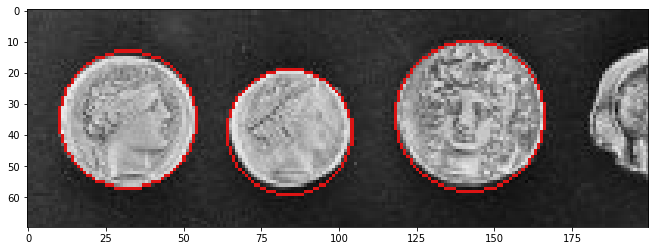

In [5]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 4))
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (220, 20, 20)
ax.imshow(image, cmap=plt.cm.gray)
plt.show()

### Ellipse detection
#### Import Library

In [6]:
import matplotlib.pyplot as plt
from skimage import data, color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter

#### Membaca Data

In [7]:
image_rgb = data.coffee()[0:220, 160:420]
image_gray = color.rgb2gray(image_rgb)

#### Implementasi Hough Transform Ellipse Detection

In [8]:
edges = canny(image_gray, sigma=2.0,
              low_threshold=0.55, high_threshold=0.8)
result = hough_ellipse(edges, accuracy=20, threshold=250,
                       min_size=100, max_size=120)
result.sort(order='accumulator')

# Menentukan parameter Ellipse
best = list(result[-1])
yc, xc, a, b = [int(round(x)) for x in best[1:5]]
orientation = best[5]

# Menunjukkan bentuk Ellipse pada gambar asli
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb[cy, cx] = (0, 0, 255)

# Menunjukkan bentuk Ellipse pada gambar hasil
edges = color.gray2rgb(img_as_ubyte(edges))
edges[cy, cx] = (250, 0, 0)

#### Visualisasi Hasil Ellipse Detection

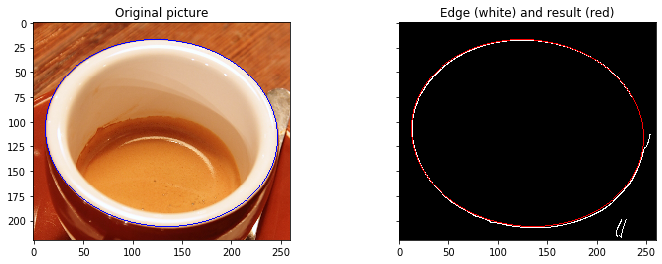

In [9]:
fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 4),
                                sharex=True, sharey=True)
ax1.set_title('Original picture')
ax1.imshow(image_rgb)
ax2.set_title('Edge (white) and result (red)')
ax2.imshow(edges)
plt.show()